# Business Understanding

If some one likes a company or product they are likely to buy something from that company.  Investment firms are always looking for the best investment opportunities.

Companies are always looking for feedback on their products from their customers. The ability to constantly understand the customer is a major part of a company's business plan. Twitter is excellent source for feedback on products and services. By understanding what users are saying about products and services, companies like Apple and Google can develop targeted Marketing Strategies to boost sales.

One of the best ways to gather this kind of information is focus on feedback from technology showcases like South by Southwest (SXSW). The data we will be using for this project is from the 2011 SXSW festival.

In [694]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [695]:
df = pd.read_csv('../../data/judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [696]:
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df.head() #Sanity Check

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [697]:
print(df.info())
print(("-"*20))
print(df.duplicated().sum())
print(("-"*20))
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      9092 non-null   object
 1   Product    3291 non-null   object
 2   Sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
22
--------------------
Tweet           1
Product      5802
Sentiment       0
dtype: int64


A lot of missing values in the product column. Maybe go through and find key words to fill in some values?

In [698]:
df['Sentiment'].value_counts() 

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Sentiment, dtype: int64

A lot of No emotions or Neutral values. And very imbalanced classes.

In [699]:
df['Product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: Product, dtype: int64

Should we group these categories into Apple and Google?

In [700]:
df.Tweet.dropna(inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [701]:
df.drop_duplicates(inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [702]:
df.drop([6, 9092], inplace=True)

In [703]:
df.reset_index(inplace=True)
df.drop(columns="index", inplace = True)

In [704]:
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9066,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9067,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product


In [705]:
print(df.isna().sum())

Tweet           0
Product      5787
Sentiment       0
dtype: int64


In [706]:
df.Product.fillna("Undefined", inplace = True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,No emotion toward brand or product
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion toward brand or product
9067,"Google's Zeiger, a physician never reported po...",Undefined,No emotion toward brand or product


(array([ 296.,  469.,  945.,  428., 5787.,   77.,  659.,   80.,  293.,
          35.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

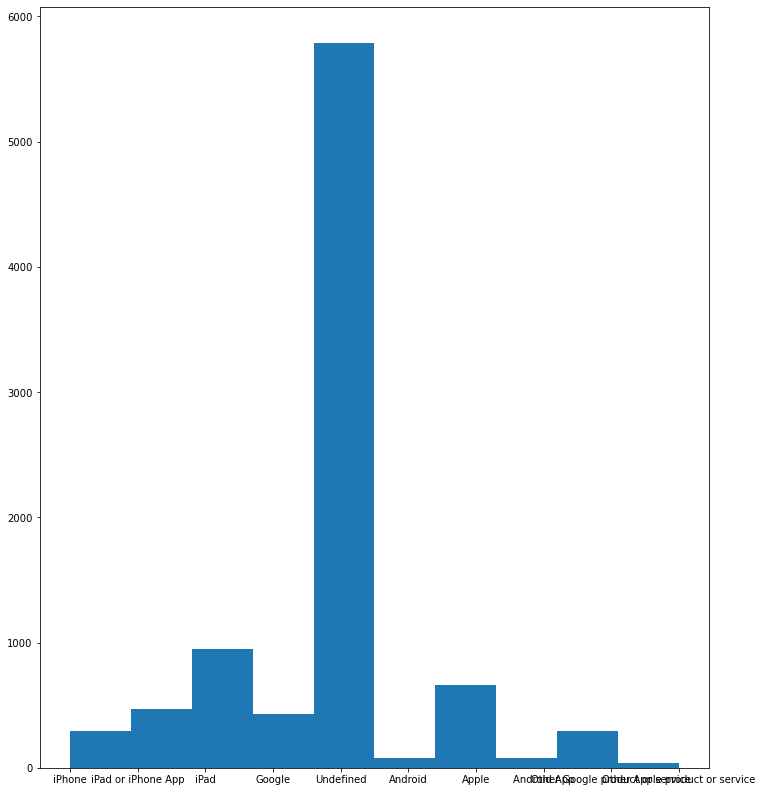

In [707]:
fig, ax = plt.subplots(figsize=(12,14))
plt.hist(df["Product"])

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      9069 non-null   object
 1   Product    9069 non-null   object
 2   Sentiment  9069 non-null   object
dtypes: object(3)
memory usage: 212.7+ KB


In [709]:
df["Product"].astype(str)

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
9064             Undefined
9065                  iPad
9066             Undefined
9067             Undefined
9068             Undefined
Name: Product, Length: 9069, dtype: object

In [710]:
def find_brand(Product, Tweet): #Building function to determine Brand
    brand = 'Undetermined' #Labeling brand as Undetermined
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))): #Labeling Google
        brand = 'Google' #Unless tweet contains google or android
    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))): #Labeling Apple
        brand = 'Apple' #Unless tweet contains apple or ip
    
    if (brand == 'Undetermined'): 
        lower_tweet = Tweet.lower() #Making tweet lowercase
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android')) #Undetermined google
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip')) #Undetermined apple
        
        if (is_google and is_apple): #if it has both identifiers in the tweet
            brand = 'Both' #Labeling brand as both
        elif (is_google):
            brand = 'Google' #Labeling brand as Google
        elif (is_apple):
            brand = 'Apple' #Labeling brand as Apple
    
    return brand

df['Brand'] = df.apply(lambda x: find_brand(x['Product'], x['Tweet']), axis = 1) #Applying function to column
df['Brand'].value_counts() #Reviewing value counts of each class within brand

Apple           5361
Google          2756
Undetermined     739
Both             213
Name: Brand, dtype: int64

In [711]:
df

,Tweet,Product,Sentiment,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
...,...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,No emotion toward brand or product,Google
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion toward brand or product,Google
9067,"Google's Zeiger, a physician never reported po...",Undefined,No emotion toward brand or product,Google


<AxesSubplot:xlabel='Brand', ylabel='Count'>

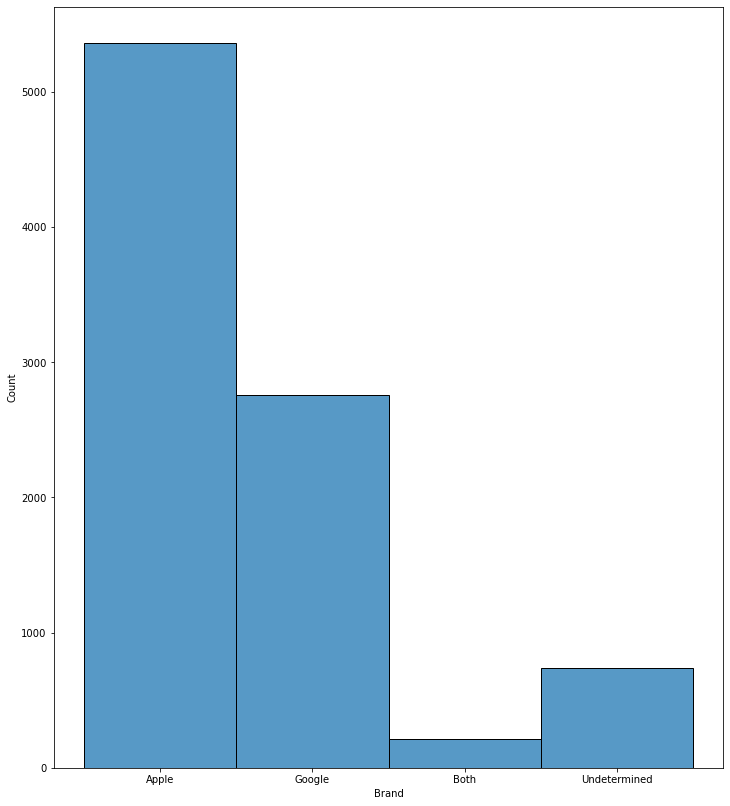

In [712]:
fig, ax = plt.subplots(figsize=(12,14))
sns.histplot(df["Brand"])

<AxesSubplot:xlabel='Brand', ylabel='count'>

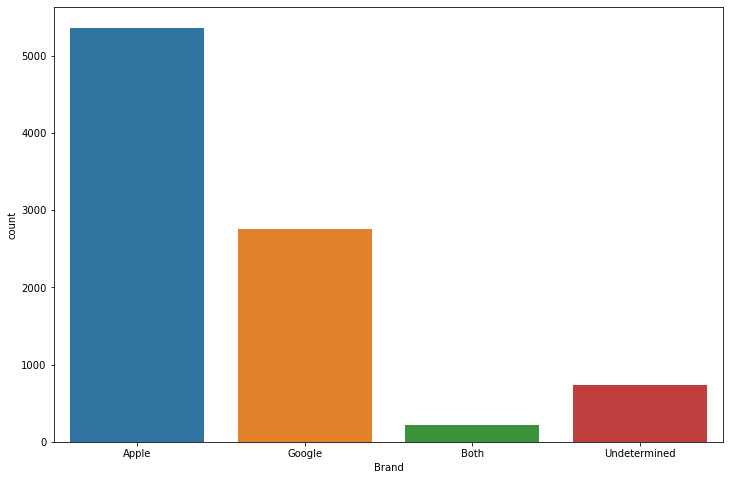

In [713]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Brand")

[Text(0, 0, 'iPhone'),
 Text(1, 0, 'iPad or iPhone App'),
 Text(2, 0, 'iPad'),
 Text(3, 0, 'Google'),
 Text(4, 0, 'Undefined'),
 Text(5, 0, 'Android'),
 Text(6, 0, 'Apple'),
 Text(7, 0, 'Android App'),
 Text(8, 0, 'Other Google product or service'),
 Text(9, 0, 'Other Apple product or service')]

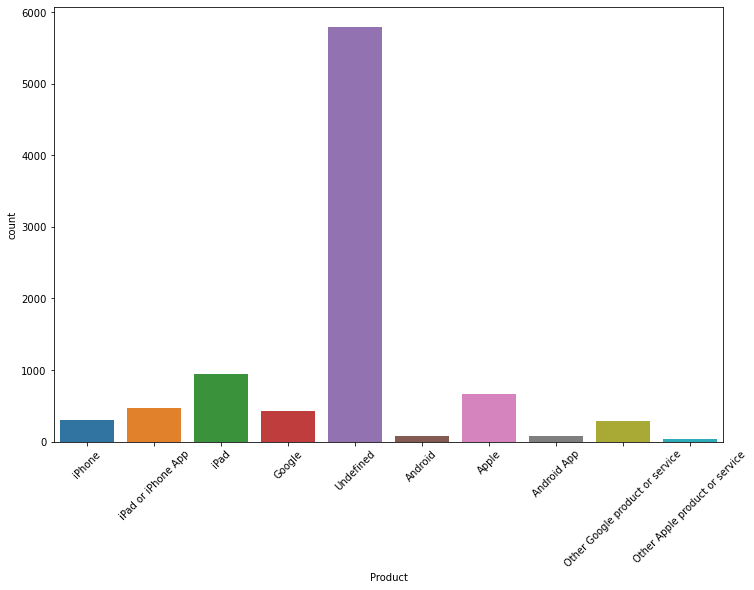

In [714]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Product")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Negative emotion'),
 Text(1, 0, 'Positive emotion'),
 Text(2, 0, 'No emotion toward brand or product'),
 Text(3, 0, "I can't tell")]

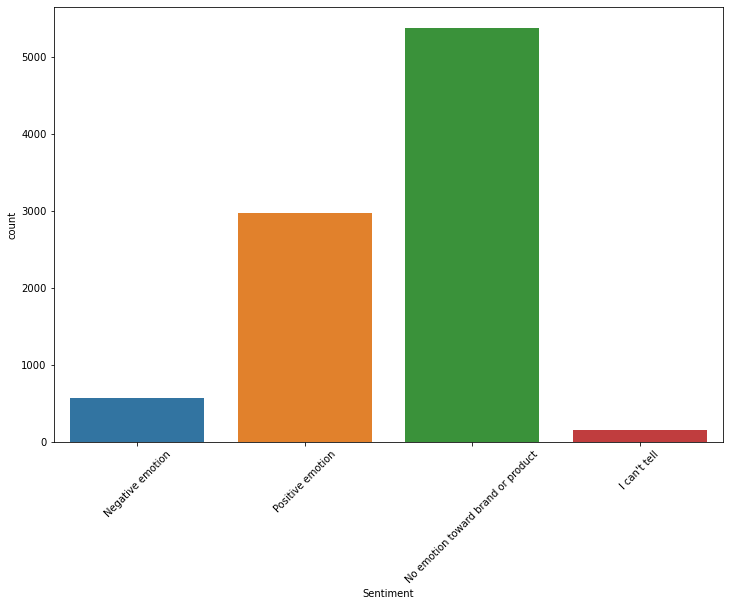

In [715]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Apple'),
 Text(1, 0, 'Google'),
 Text(2, 0, 'Both'),
 Text(3, 0, 'Undetermined')]

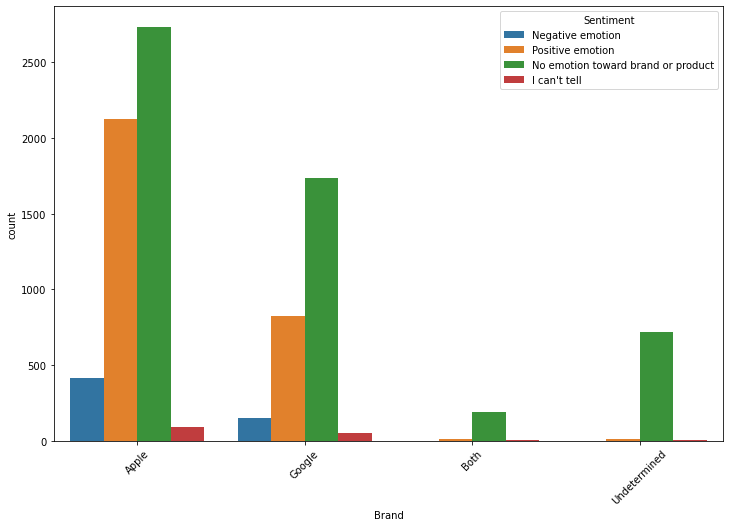

In [716]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Brand", hue = "Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Negative emotion'),
 Text(1, 0, 'Positive emotion'),
 Text(2, 0, 'No emotion toward brand or product'),
 Text(3, 0, "I can't tell")]

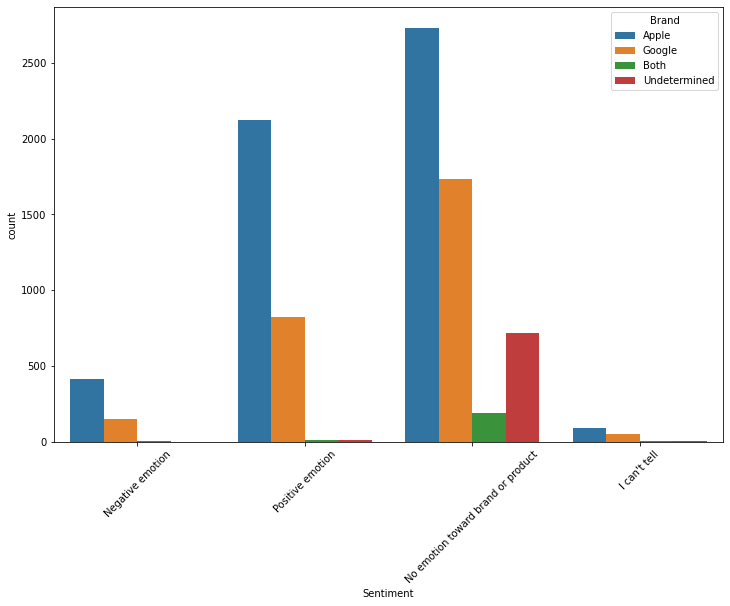

In [717]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x="Sentiment", hue = "Brand")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

In [718]:
grouped = df.groupby(["Brand", "Sentiment"]).count()

In [719]:
grouped

Tweet  Product
Brand        Sentiment                                         
Apple        I can't tell                           93       93
             Negative emotion                      415      415
             No emotion toward brand or product   2730     2730
             Positive emotion                     2123     2123
Both         I can't tell                            7        7
             Negative emotion                        3        3
             No emotion toward brand or product    192      192
             Positive emotion                       11       11
Google       I can't tell                           50       50
             Negative emotion                      150      150
             No emotion toward brand or product   1733     1733
             Positive emotion                      823      823
Undetermined I can't tell                            6        6
             Negative emotion                        1        1
             No emotion toward brand or product    719      719
             Positive emotion                       13       13

In [720]:
display(df.groupby(['Sentiment'])['Brand'].value_counts(normalize = True))
print("-"*60)
display(df.groupby(['Brand'])['Sentiment'].value_counts(normalize = True))

Sentiment                           Brand       
I can't tell                        Apple           0.596154
                                    Google          0.320513
                                    Both            0.044872
                                    Undetermined    0.038462
Negative emotion                    Apple           0.729350
                                    Google          0.263620
                                    Both            0.005272
                                    Undetermined    0.001757
No emotion toward brand or product  Apple           0.508001
                                    Google          0.322479
                                    Undetermined    0.133792
                                    Both            0.035728
Positive emotion                    Apple           0.714815
                                    Google          0.277104
                                    Undetermined    0.004377
                                    

------------------------------------------------------------


Brand         Sentiment                         
Apple         No emotion toward brand or product    0.509233
              Positive emotion                      0.396008
              Negative emotion                      0.077411
              I can't tell                          0.017348
Both          No emotion toward brand or product    0.901408
              Positive emotion                      0.051643
              I can't tell                          0.032864
              Negative emotion                      0.014085
Google        No emotion toward brand or product    0.628810
              Positive emotion                      0.298621
              Negative emotion                      0.054427
              I can't tell                          0.018142
Undetermined  No emotion toward brand or product    0.972936
              Positive emotion                      0.017591
              I can't tell                          0.008119
              Negative emotion      

In [721]:
cleaned = df.copy()

In [722]:
# cleaned = cleaned[cleaned["Product"].str.contains("Undefined")==False].reset_index()

In [723]:
cleaned

,Tweet,Product,Sentiment,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
...,...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,No emotion toward brand or product,Google
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion toward brand or product,Google
9067,"Google's Zeiger, a physician never reported po...",Undefined,No emotion toward brand or product,Google


In [724]:
# cleaned = cleaned[cleaned["Sentiment"].str.contains("No emotion toward brand or product|I can't tell")==False].reset_index()

In [725]:
# cleaned = cleaned.drop("index", axis =1)

In [726]:
# cleaned = cleaned.drop("level_0", axis =1)

In [727]:
# cleaned

In [728]:
cleaned["Product"].value_counts()

Undefined                          5787
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: Product, dtype: int64

In [729]:
cleaned["Sentiment"].value_counts()

No emotion toward brand or product    5374
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: Sentiment, dtype: int64

In [730]:
cleaned["Brand"].value_counts()

Apple           5361
Google          2756
Undetermined     739
Both             213
Name: Brand, dtype: int64

<AxesSubplot:xlabel='Brand', ylabel='Count'>

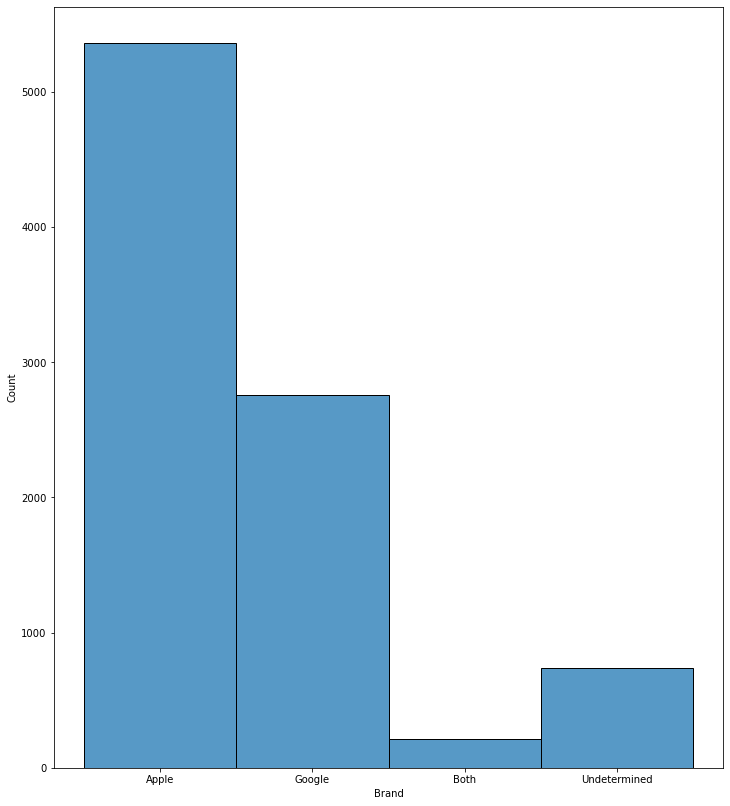

In [731]:
fig, ax = plt.subplots(figsize=(12,14))
sns.histplot(cleaned["Brand"])

<AxesSubplot:xlabel='Brand', ylabel='count'>

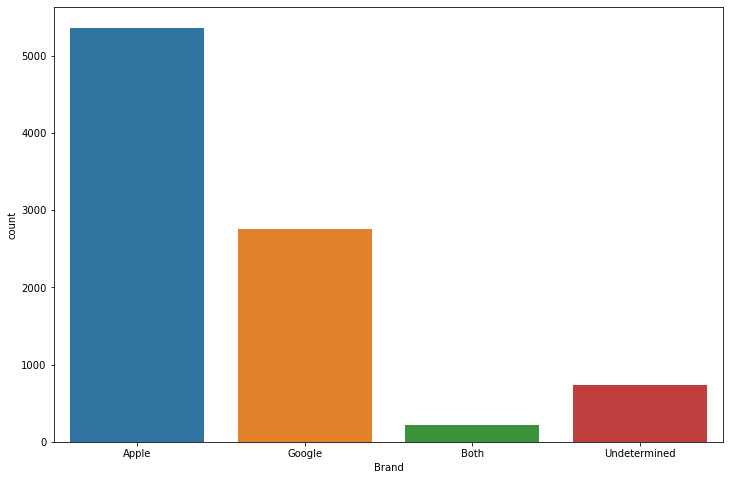

In [732]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Brand")

[Text(0, 0, 'iPhone'),
 Text(1, 0, 'iPad or iPhone App'),
 Text(2, 0, 'iPad'),
 Text(3, 0, 'Google'),
 Text(4, 0, 'Undefined'),
 Text(5, 0, 'Android'),
 Text(6, 0, 'Apple'),
 Text(7, 0, 'Android App'),
 Text(8, 0, 'Other Google product or service'),
 Text(9, 0, 'Other Apple product or service')]

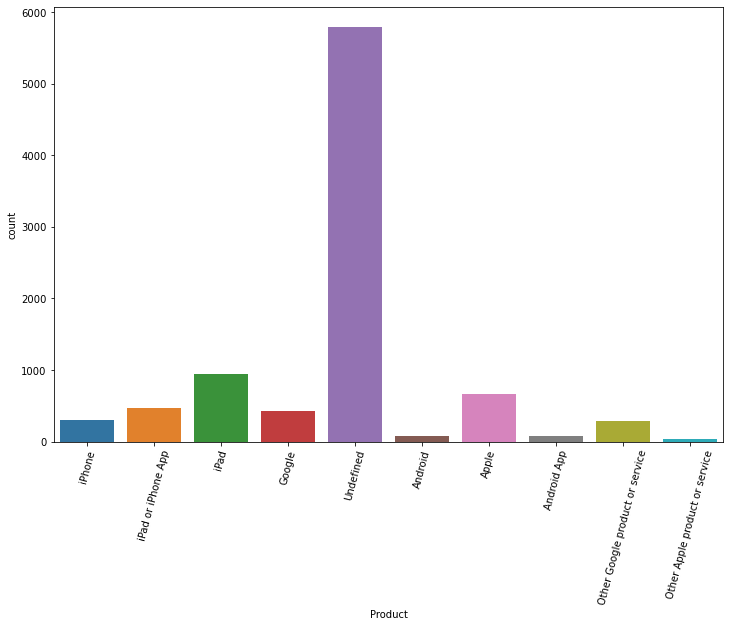

In [733]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Product")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 75)

[Text(0, 0, 'Negative emotion'),
 Text(1, 0, 'Positive emotion'),
 Text(2, 0, 'No emotion toward brand or product'),
 Text(3, 0, "I can't tell")]

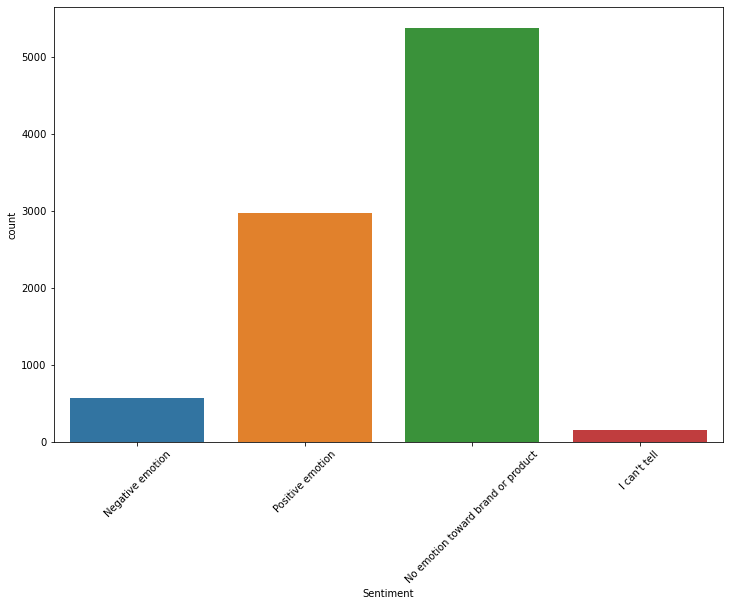

In [734]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Apple'),
 Text(1, 0, 'Google'),
 Text(2, 0, 'Both'),
 Text(3, 0, 'Undetermined')]

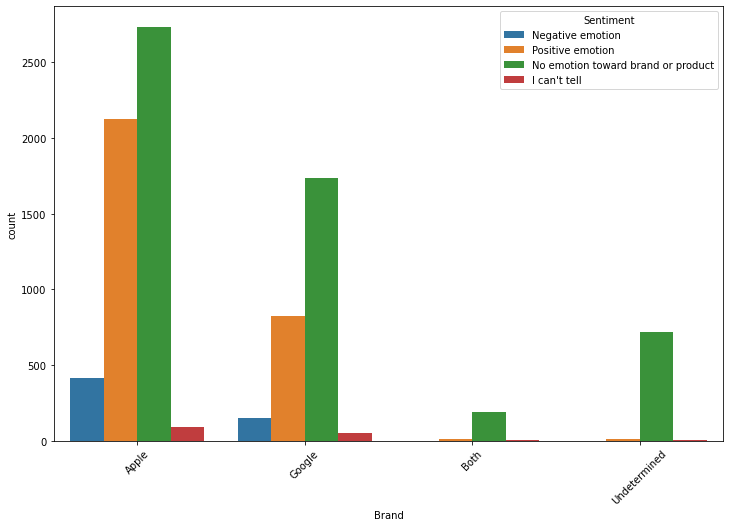

In [735]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Brand", hue = "Sentiment")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

[Text(0, 0, 'Negative emotion'),
 Text(1, 0, 'Positive emotion'),
 Text(2, 0, 'No emotion toward brand or product'),
 Text(3, 0, "I can't tell")]

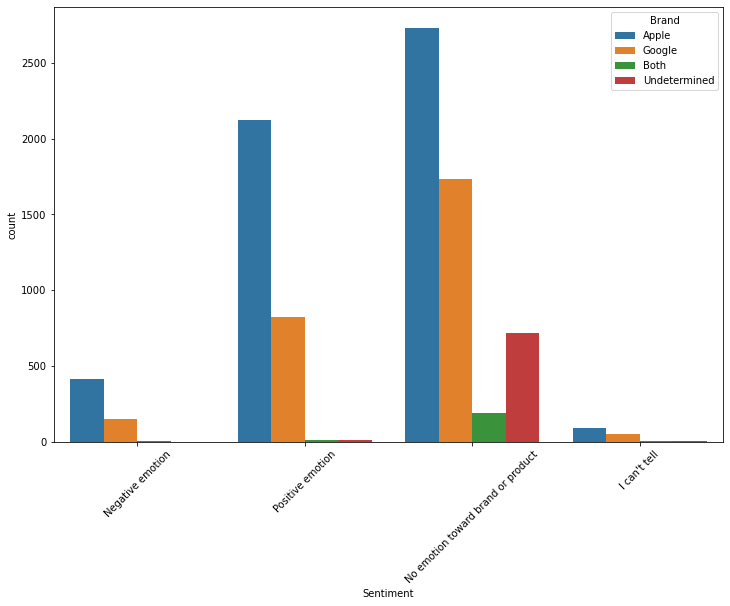

In [736]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = cleaned, x="Sentiment", hue = "Brand")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45)

In [737]:
display(cleaned.groupby(['Brand'])['Sentiment'].value_counts(normalize = True))
print("-"*60)
display(cleaned.groupby(['Sentiment'])['Brand'].value_counts(normalize = True))
print("-"*60)
display(cleaned.groupby(['Product'])['Sentiment'].value_counts(normalize = True))
print("-"*60)
display(cleaned.groupby(['Sentiment'])['Product'].value_counts(normalize = True))

Brand         Sentiment                         
Apple         No emotion toward brand or product    0.509233
              Positive emotion                      0.396008
              Negative emotion                      0.077411
              I can't tell                          0.017348
Both          No emotion toward brand or product    0.901408
              Positive emotion                      0.051643
              I can't tell                          0.032864
              Negative emotion                      0.014085
Google        No emotion toward brand or product    0.628810
              Positive emotion                      0.298621
              Negative emotion                      0.054427
              I can't tell                          0.018142
Undetermined  No emotion toward brand or product    0.972936
              Positive emotion                      0.017591
              I can't tell                          0.008119
              Negative emotion      

------------------------------------------------------------


Sentiment                           Brand       
I can't tell                        Apple           0.596154
                                    Google          0.320513
                                    Both            0.044872
                                    Undetermined    0.038462
Negative emotion                    Apple           0.729350
                                    Google          0.263620
                                    Both            0.005272
                                    Undetermined    0.001757
No emotion toward brand or product  Apple           0.508001
                                    Google          0.322479
                                    Undetermined    0.133792
                                    Both            0.035728
Positive emotion                    Apple           0.714815
                                    Google          0.277104
                                    Undetermined    0.004377
                                    

------------------------------------------------------------


Product                          Sentiment                         
Android                          Positive emotion                      0.883117
                                 Negative emotion                      0.103896
                                 No emotion toward brand or product    0.012987
Android App                      Positive emotion                      0.887500
                                 Negative emotion                      0.100000
                                 No emotion toward brand or product    0.012500
Apple                            Positive emotion                      0.820941
                                 Negative emotion                      0.144158
                                 No emotion toward brand or product    0.031866
                                 I can't tell                          0.003035
Google                           Positive emotion                      0.803738
                                 Negative emotion   

------------------------------------------------------------


Sentiment                           Product                        
I can't tell                        Undefined                          0.942308
                                    iPad                               0.025641
                                    Apple                              0.012821
                                    Google                             0.006410
                                    Other Google product or service    0.006410
                                    iPhone                             0.006410
Negative emotion                    iPad                               0.219684
                                    iPhone                             0.179262
                                    Apple                              0.166960
                                    Google                             0.119508
                                    iPad or iPhone App                 0.110721
                                    Undefined       

# Cleaning Data for NLP

In [738]:
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

In [739]:
cleaned

,Tweet,Product,Sentiment,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
...,...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,No emotion toward brand or product,Google
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion toward brand or product,Google
9067,"Google's Zeiger, a physician never reported po...",Undefined,No emotion toward brand or product,Google


In [740]:
cleaned['Hashtag'] = cleaned['Tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))

In [741]:
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords_list = stopwords.words("english")
lemma = WordNetLemmatizer()
tweet_tknzr = TweetTokenizer(strip_handles=True)

In [742]:
test = cleaned["Tweet"].iloc[0]
test

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [743]:
def clean_tweets(text):
    no_handle = tweet_tknzr.tokenize(text)
    tweet = " ".join(no_handle)
    clean = re.sub("(https?:\/\/\S+) \
                   |(#[A-Za-z0-9_]+) \
                   |(\{([a-zA-Z].+)\}) \
                   |(&[a-z]+;) \
                   |(www\.[a-z]?\.?(com)+|[a-z]+\.(com))\
                   |({link})\
                   |(\[video\])\
                   |([^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*)"," ", tweet)
    lower = clean.lower()
    token_list = tokenizer.tokenize(lower)
    stopwords_removed=[token for token in token_list if token not in stopwords_list]
    lemma_list = [lemma.lemmatize(token) for token in stopwords_removed]
    return lemma_list

In [744]:
clean_tweets(test)

['iphone',
 'hr',
 'tweeting',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'station',
 'sxsw']

In [745]:
cleaned["Cleaned Tweet"]= cleaned.Tweet.apply(lambda x: clean_tweets(x))
cleaned

,Tweet,Product,Sentiment,Brand,Hashtag,Cleaned Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,"[#RISE_Austin, #SXSW]","[iphone, hr, tweeting, rise_austin, dead, need..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,[#SXSW],"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,"[#iPad, #SXSW]","[wait, ipad, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,[#sxsw],"[hope, year, festival, crashy, year, iphone, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,[#SXSW],"[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,No emotion toward brand or product,Google,[#SXSW],"[yup, third, app, yet, android, suggestion, sxsw]"
9065,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple,[#SXSW],"[ipad, everywhere, sxsw, link]"
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion toward brand or product,Google,"[#sxsw, #google, #circles]","[wave, buzz, interrupt, regularly, scheduled, ..."
9067,"Google's Zeiger, a physician never reported po...",Undefined,No emotion toward brand or product,Google,"[#sxsw, #health2dev]","[google, zeiger, physician, never, reported, p..."


In [746]:
cleaned["Sentiment"].value_counts()

No emotion toward brand or product    5374
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: Sentiment, dtype: int64

In [747]:
dict_sent = {'No emotion toward brand or product':0, 
             'Positive emotion':1,
             'Negative emotion':0,
             "I can't tell": 0}
cleaned['Sentiment'] = cleaned['Sentiment'].map(dict_sent)

In [748]:
cleaned["Sentiment"].value_counts()

0    6099
1    2970
Name: Sentiment, dtype: int64

In [608]:
# cleaned["Sentiment"] = cleaned["Sentiment"].apply(lambda x: 2 if x == "Positive emotion" 1 elif x == "No emotion toward brand or product" 1 elif x == "I can't tell" else 0)

In [609]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [610]:
cleaned["Cleaned Tweet"] = cleaned["Cleaned Tweet"].str.join(" ")

In [611]:
cleaned

,Tweet,Product,Sentiment,Brand,Hashtag,Cleaned Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,Apple,"[#RISE_Austin, #SXSW]",iphone hr tweeting rise_austin dead need upgra...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,2,Apple,[#SXSW],know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,2,Apple,"[#iPad, #SXSW]",wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,Apple,[#sxsw],hope year festival crashy year iphone app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,2,Google,[#SXSW],great stuff fri sxsw marissa mayer google tim ...
...,...,...,...,...,...,...
9064,"@mention Yup, but I don't have a third app yet...",Undefined,1,Google,[#SXSW],yup third app yet android suggestion sxsw
9065,Ipad everywhere. #SXSW {link},iPad,2,Apple,[#SXSW],ipad everywhere sxsw link
9066,"Wave, buzz... RT @mention We interrupt your re...",Undefined,1,Google,"[#sxsw, #google, #circles]",wave buzz interrupt regularly scheduled sxsw g...
9067,"Google's Zeiger, a physician never reported po...",Undefined,1,Google,"[#sxsw, #health2dev]",google zeiger physician never reported potenti...


In [612]:
X = cleaned["Cleaned Tweet"]
y = cleaned["Sentiment"]
SEED = 42

X_use, X_hold, y_use, y_hold = train_test_split(X, y, test_size=0.1, random_state=SEED)

X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.2, random_state=SEED)

In [613]:
X_train.shape

(6529,)

In [614]:
train_sanity = X_train.index.get_loc(1)
X_train.iloc[train_sanity]

'know awesome ipad iphone app likely appreciate design also giving free sxsw'

In [615]:
vectorizer = TfidfVectorizer(
    max_df=.95,  # removes words that appear in more than 95% of Tweets
    min_df=2 # removes words that appear 2 or fewer times
)  

In [616]:
vectorizer.fit(X_train)

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [617]:
X_train.iloc[train_sanity]

'know awesome ipad iphone app likely appreciate design also giving free sxsw'

In [618]:
tfidf_train_df = pd.DataFrame(X_train_vec.toarray(), 
                              columns=vectorizer.get_feature_names(), 
                              index=X_train.index)

In [619]:
test_doc = tfidf_train_df.iloc[train_sanity]

test_doc[test_doc > 0].sort_values(ascending=False).head(15)

appreciate    0.486191
likely        0.408591
giving        0.329836
also          0.322361
design        0.299664
awesome       0.291610
know          0.273522
free          0.238390
app           0.193770
iphone        0.154171
ipad          0.127154
Name: 1, dtype: float64

In [620]:
tfidf_train_df

,000,100,101,106,10x,11am,11ntc,11p,11pm,128,...,zinio,zip,zlf,zomb,zombie,zomg,zone,zoom,zuckerberg,zynga
2633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Neural Network with GLOVE

In [621]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from tensorflow.keras import regularizers
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [622]:
max_length = max([len(s.split()) for s in X_train])
max_length

19

In [623]:
k_tokenizer = keras.preprocessing.text.Tokenizer(num_words = 6500)

k_tokenizer.fit_on_texts(X_train)

X_train_token = k_tokenizer.texts_to_sequences(X_train)
X_test_token = k_tokenizer.texts_to_sequences(X_test)

In [624]:
X_train_processed = keras.preprocessing.sequence.pad_sequences(
    X_train_token, maxlen=max_length, padding='post')
X_test_processed = keras.preprocessing.sequence.pad_sequences(
    X_test_token, maxlen=max_length, padding='post')

In [625]:
vocab_size = len(k_tokenizer.word_index) +1
maxlen= 100
print(vocab_size)

7351


In [626]:
def create_embedding_matrix(glove_filepath, word_index, embedding_dim):
    '''
    Grabs the embeddings just for the words in our vocabulary
    
    Inputs:
    glove_filepath - string, location of the glove text file to use
    word_index - word_index attribute from the keras tokenizer
    embedding_dim - int, number of dimensions to embed, a hyperparameter
    
    Output:
    embedding_matrix - numpy array of embeddings
    '''
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(glove_filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [627]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt',
                                           k_tokenizer.word_index, 
                                           embedding_dim)

In [757]:
model = keras.models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=max_length, 
                           trainable=True))
model.add(layers.Flatten()) # flattening these layers down before connecting to dense layer

model.add(layers.Dense(vocab_size, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 19, 50)            367550    
_________________________________________________________________
flatten_37 (Flatten)         (None, 950)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 7351)              6990801   
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 7352      
Total params: 7,365,703
Trainable params: 7,365,703
Non-trainable params: 0
_________________________________________________________________


In [758]:
history = model.fit(X_train_processed, y_train, 
                    batch_size=100, 
                    epochs=15, 
                    validation_data=(X_test_processed, y_test))

Epoch 1/15
66/66 [==============================] - 15s 232ms/step - loss: -56.3778 - accuracy: 0.6123 - val_loss: -128.9387 - val_accuracy: 0.5946
Epoch 2/15
66/66 [==============================] - 15s 221ms/step - loss: -195.4848 - accuracy: 0.6123 - val_loss: -290.3593 - val_accuracy: 0.5946
Epoch 3/15
66/66 [==============================] - 14s 220ms/step - loss: -343.1084 - accuracy: 0.6123 - val_loss: -438.4600 - val_accuracy: 0.5946
Epoch 4/15
66/66 [==============================] - 12s 188ms/step - loss: -480.1467 - accuracy: 0.6123 - val_loss: -579.9270 - val_accuracy: 0.5946
Epoch 5/15
66/66 [==============================] - 10s 145ms/step - loss: -612.1146 - accuracy: 0.6123 - val_loss: -718.2054 - val_accuracy: 0.5946
Epoch 6/15
66/66 [==============================] - 12s 178ms/step - loss: -741.6038 - accuracy: 0.6123 - val_loss: -855.5842 - val_accuracy: 0.5946
Epoch 7/15
66/66 [==============================] - 11s 160ms/step - loss: -869.1386 - accuracy: 0.6123 - v

In [753]:
score = model.evaluate(X_test_processed, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: -1686278.125
Test accuracy: 0.5946111679077148


In [754]:
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

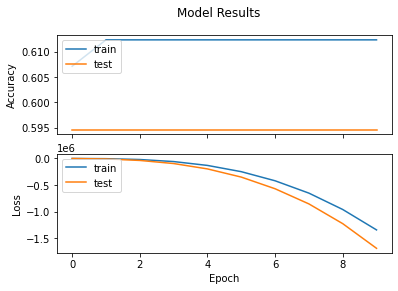

In [755]:
visualize_training_results(history)

In [350]:
np.__version__

'1.21.4'

In [342]:
bag_of_words = cleaned['Cleaned Tweet']
words_list = []
for string_ele in bag_of_words:
    split_up_words = string_ele.split()
    for i in range(0, len(split_up_words)):
        words_list.append(split_up_words[i])
        
total_vocabulary = set(words_list)
len(total_vocabulary)

8471